# Simulation using example data

In [3]:
from covid19_supermarket_abm.utils.load_example_data import load_example_store_graph, load_example_paths
from covid19_supermarket_abm.path_generators import get_path_generator
from covid19_supermarket_abm.simulator import simulate_one_day

# Set parameters
config = {'arrival_rate': 2.55,  # Poisson rate at which customers arrive
           'traversal_time': 0.2,  # mean wait time per node
           'num_hours_open': 14,  # store opening hours
           'infection_proportion': 0.0011,  # proportion of customers that are infectious
         }

# load synthetic data
zone_paths = load_example_paths()
G = load_example_store_graph()

# Create a path generator which feeds our model with customer paths
path_generator_function, path_generator_args = get_path_generator(zone_paths=zone_paths, G=G)

# Simulate a day and store results in results
results_dict = simulate_one_day(config, G, path_generator_function, path_generator_args)

# Show network

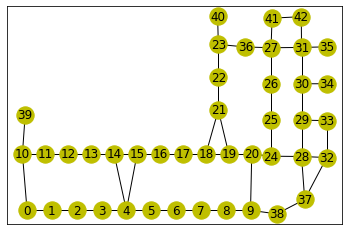

In [4]:
import networkx as nx
pos = nx.get_node_attributes(G, 'pos')
nx.draw_networkx(G, pos=pos, node_color='y')

# Show paths

In [5]:
zone_paths

[[41, 19, 0, 6, 25, 4, 19, 26, 35, 42],
 [40, 18, 34, 42],
 [39, 10, 10, 3, 35, 42],
 [40, 13, 33, 42],
 [39, 7, 13, 14, 35, 42],
 [39, 11, 14, 34, 42],
 [40, 38, 33, 42],
 [40, 6, 34, 42],
 [39, 25, 38, 33, 42],
 [39, 9, 33, 42],
 [39, 0, 35, 42],
 [40, 3, 22, 37, 35, 42],
 [41, 25, 33, 42],
 [40, 38, 21, 13, 19, 33, 42],
 [39, 17, 3, 35, 42],
 [39, 8, 7, 17, 10, 5, 37, 33, 42],
 [40, 26, 33, 42],
 [40, 19, 10, 6, 28, 1, 28, 34, 42],
 [40, 2, 9, 33, 42],
 [39, 13, 12, 16, 34, 42],
 [39, 22, 16, 11, 33, 42],
 [40, 6, 1, 4, 33, 42],
 [41, 0, 14, 26, 34, 42],
 [40, 11, 9, 33, 42],
 [41, 4, 33, 42],
 [39, 13, 11, 34, 42],
 [39, 1, 19, 9, 33, 42],
 [41, 37, 33, 42],
 [39, 38, 34, 42],
 [41, 8, 7, 3, 38, 33, 42],
 [39, 36, 35, 42],
 [40, 15, 17, 4, 25, 33, 42],
 [41, 10, 33, 42],
 [39, 13, 6, 33, 42],
 [39, 9, 4, 33, 42],
 [40, 6, 36, 4, 35, 42],
 [41, 8, 34, 42],
 [40, 4, 6, 33, 42],
 [41, 16, 4, 33, 42],
 [40, 2, 21, 6, 0, 34, 42],
 [41, 8, 33, 42],
 [39, 18, 33, 42],
 [39, 37, 33, 42],
 

# Examine results

In [6]:
results_dict.keys()

dict_keys(['num_cust', 'num_S', 'num_I', 'total_exposure_time', 'num_contacts_per_cust', 'num_cust_w_contact', 'mean_num_cust_in_store', 'max_num_cust_in_store', 'num_contacts', 'shopping_times', 'mean_shopping_time', 'num_waiting_people', 'mean_waiting_time', 'store_open_length', 'df_num_encounters_per_node', 'df_exposure_time_per_node', 'total_time_crowded', 'exposure_times', 'logs'])

In [7]:
results_dict

{'num_cust': 2111,
 'num_S': 2110,
 'num_I': 1,
 'total_exposure_time': 2.688375932384588,
 'num_contacts_per_cust': [7, 10, 1, 2, 4],
 'num_cust_w_contact': 5,
 'mean_num_cust_in_store': 26.569767441860463,
 'max_num_cust_in_store': 39,
 'num_contacts': 24,
 'shopping_times': [5.856623395984756,
  7.357300532052817,
  5.658978386200303,
  6.686315933676145,
  8.732400548922419,
  5.192825938774541,
  5.969250462304022,
  6.055779365923918,
  7.754240718202374,
  11.88784638880043,
  13.080806210687905,
  9.134689061348752,
  9.78881194182948,
  15.226460480422501,
  7.278722479468321,
  12.715776869410105,
  4.6965554839451205,
  10.53833486197029,
  9.69501516328532,
  6.068083876029467,
  8.499080489035336,
  8.62856044332375,
  11.219446850426316,
  4.734182005288352,
  9.542722181458233,
  10.483020181740295,
  13.56231017885716,
  7.226921166821274,
  8.625482096370067,
  7.06116188265263,
  14.739301072370427,
  14.382661281525696,
  9.14883978010657,
  14.83772469029314,
  16.3

In [8]:
results_dict['df_num_encounters_per_node']

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,1,0,0,0,0,1


In [9]:
results_dict['df_exposure_time_per_node']

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,0,0,0,0,0,0,0,0,0,...,0.208468,0,0,0,0.307458,0,0,0,0,0.113623


# How to apply this to your own data

## Decide your config file

In [10]:
config = {
    # Mandatory parameters
    'arrival_rate': 2.55,  # Poisson rate at which customers arrive
    'traversal_time': 0.2,  # mean wait time per node
    'num_hours_open': 14,  # store opening hours
    'infection_proportion': 0.0011,  # proportion of customers that are infectious

    # Optional parameters
    'max_customers_in_store': None, # Maximum number of people allowed in store.
    'with_node_capacity': False,  # Set to True to limit the number of customers in each node. (Default: False).
                                 # WARNING: This may cause simulations not to terminate due to gridlocks.
    'node_capacity': 2,  # The number of customers allowed in each node, if with_node_capacity is set to True. 
                        #(Default: 2)
    'logging_enabled': True, # Set to True to start logging simulations. (Default: False). 
                            # The logs can be accessed in results_dict['logs']. 
                            # Also if sanity checks fail, logs will be saved to file.
         }

## Create or load your store network

We use the NetworkX package to create our store network.

First, we need to specify the (x,y) coordinates of each node. So in a very simple example, we have four nodes, arranged in a square at with coordinates (0,0), (0,1), (1,0), and (1,1).

In [11]:
pos = {0: (0,0), 1: (0,1), 2: (1,0), 3: (1,1)}

Next, we need to specify the edges in the network; in other words, which nodes are connected to each other.

In [12]:
edges = [(0,1), (1,3), (0,2), (2,3)]

We create the graph as follows.

In [13]:
from covid19_supermarket_abm.utils.create_store_network import create_store_network
G = create_store_network(pos, edges)

To visualize your network, you can use `nx.draw_networkx`:

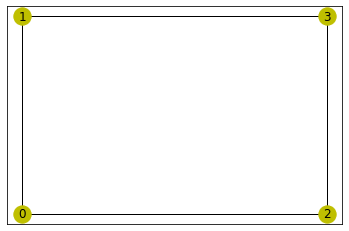

In [14]:
import networkx as nx
nx.draw_networkx(G, pos=pos, node_color='y')

We can also specify a directed graph as by using the `directed` parameter in `create_store_network`.

In [15]:
from covid19_supermarket_abm.utils.create_store_network import create_store_network
edges = [(0,1), (1,3), (3,1), (0,2), (3,2), (2,3)]
G = create_store_network(pos, edges, directed=True)

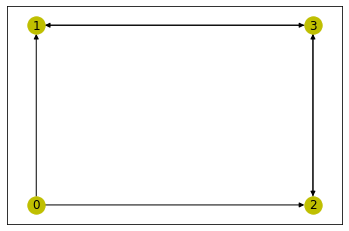

In [16]:
import networkx as nx
nx.draw_networkx(G, pos=pos, node_color='y')

In this example, let's stick to undirected graphs.

In [17]:
from covid19_supermarket_abm.utils.create_store_network import create_store_network
G = create_store_network(pos, edges)

## Choose or create your path generator

The path generator is what its name suggests: It is a generator that yields full customer paths.

There are two* path generators implemented in this package.

(1) Empirical path generator

(2) Synthetic path generator

You can also implement your own path generator and pass it.

To use one of the implemented path generators, it is often easiest to use the get_path_generator function from the `covid19_supermarket_abm.path_generators` module.



### Empirical path generator
The empirical path generator takes as input a list of full paths (which can be empirical paths or synthetically created paths) and yields random paths from that list. Note that all paths must be valid paths in the store network or the simulation will fail at runtime.

To use it, simply

In [18]:
from covid19_supermarket_abm.path_generators import get_path_generator
full_paths = [[0, 1, 3], [0, 2, 3]]  # paths in the store network
path_generator_function, path_generator_args = get_path_generator(path_generation='empirical', full_paths=full_paths) 

Alternatively, you can input a list of what we call *zone paths* and the store network `G`.
A zone path is a sequence of nodes that a customer visits, but where consecutive nodes in the sequence need not be adjacent.
In the paper, this sequence represents the item locations of where a customer bought items along with the 
entrance, till and exit node that they visited.
The `get_path_generator` function automatically converts these zone paths to full paths by choosing shortest paths between
consecutive nodes in the zone path.

In [19]:
from covid19_supermarket_abm.path_generators import get_path_generator
zone_paths = [[0, 3], [0, 2, 1], [0, 3, 2]]  # note that consecutive nodes need not be adjacent!
path_generator_function, path_generator_args = get_path_generator(path_generation='empirical', G=G, zone_paths=zone_paths)

There is also the option to use a synthetic path generator that generates shopping baskets and then creates paths based on that.
More details can be found in [https://github.com/fabianying/covid19-supermarket-abm#synthetic-path-generator](https://github.com/fabianying/covid19-supermarket-abm#synthetic-path-generator)

## Now we are ready to simulate

In [20]:
results_dict = simulate_one_day(config, G, path_generator_function, path_generator_args)

In [21]:
results_dict['df_num_encounters_per_node']

,0,1,2,3
0,13,4,12,0


We can also simulate several days in parallel.

In [26]:
from covid19_supermarket_abm.simulator import simulate_several_days
results = simulate_several_days(config, G, path_generator_function, path_generator_args, num_iterations=50,
                                    use_parallel=True)

100%|██████████| 50/50 [00:06<00:00,  7.70it/s]


This time the results are a tuple with 3 elements.

The first element is a dataframe with most of the simulation metrics - one row for each simulation.

In [33]:
results[0]

,num_cust,num_S,num_I,total_exposure_time,num_cust_w_contact,mean_num_cust_in_store,max_num_cust_in_store,num_contacts,mean_shopping_time,num_waiting_people,mean_waiting_time,store_open_length,total_time_crowded,exposure_times
0,2189,2188,1,0.138925,1,2.835294,8,2,1.200056,0,0,840,27.082463,[0.13892466363461153]
1,2111,2111,0,0.000000,0,2.882353,9,0,1.211908,0,0,840,28.228567,[]
2,2136,2136,0,0.000000,0,3.023529,7,0,1.196408,0,0,840,30.324187,[]
3,2166,2166,0,0.000000,0,3.129412,8,0,1.195715,0,0,840,27.950825,[]
4,2122,2119,3,2.484502,11,2.788235,8,18,1.205487,0,0,840,24.438494,"[0.08619891217286124, 0.3482995318051678, 0.09..."
5,2115,2112,3,2.673832,15,2.647059,8,30,1.185006,0,0,840,26.085095,"[0.0009043923759719519, 0.0009043923759719519,..."
6,2106,2103,3,4.122686,13,3.329412,8,28,1.206666,0,0,840,27.716598,"[0.5228660479323606, 0.04533215282253167, 0.09..."
7,2013,2011,2,1.421950,7,2.588235,8,13,1.208505,0,0,840,21.754315,"[0.20482299660521264, 0.030714393807635076, 0...."
8,2182,2180,2,3.528766,15,3.352941,11,35,1.190858,0,0,840,25.988232,"[0.1124309216300503, 0.35126670160411777, 0.17..."
9,2105,2103,2,0.113317,2,2.941176,9,3,1.181873,0,0,840,19.776781,"[0.09242657482241157, 0.02089002355376124]"


The second element gives the number of contacts at each node (column) for each simulation (row).

In [37]:
results[1]

,0,1,2,3
0,1,1,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,13,3,2,0
5,10,4,12,4
6,10,11,7,0
7,6,6,1,0
8,15,6,14,0
9,3,0,0,0


The third element gives the total exposure time at each node (column) for each simulation (row).

In [38]:
results[2]

,0,1,2,3
0,0.051148,0.087776,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000
4,1.669343,0.437104,0.378055,0.000000
5,0.566592,0.383432,1.117189,0.606620
6,0.947352,2.080462,1.094872,0.000000
7,0.489213,0.851711,0.081027,0.000000
8,1.375571,0.295012,1.858184,0.000000
9,0.113317,0.000000,0.000000,0.000000
